## Lab 2: Data Exploration of Traveler dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Exploration by a Data Analysist:
   
   - Is there any mistakes in the data?
   - Does the data have peculiar behavior?
   - Do I need to fix or remove any of the data to be more realistic?


In [2]:
#Lets load data from train and test datasets
train_users = pd.read_csv('./traveler_dataset/train_users_2.csv')
test_users = pd.read_csv('./traveler_dataset/test_users.csv')

In [3]:
## How many users are in training set and test set
print("We have", train_users.shape[0], "users in the training set and", 
      test_users.shape[0], "in the test set.")
print("In total we have", train_users.shape[0] + test_users.shape[0], "users.")

We have 213451 users in the training set and 62096 in the test set.
In total we have 275547 users.


In [5]:
# Merge train and test users
users = pd.concat((train_users, test_users), axis = 0, ignore_index = True, sort = False)
users.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [6]:
# Remove ID's since, we are not interested in making predictions with ids
users.drop('id',axis = 1, inplace = True)

users.head()

,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


### Untouched missing data
 - **Viewing the data:** gender attribute has certain values being **-unknown-**. 
 - Transform these values into **NaN**.
    

In [7]:
users.gender.head()

0    -unknown-
1         MALE
2       FEMALE
3       FEMALE
4    -unknown-
Name: gender, dtype: object

#### Exercise 1:
 - Replace -unknown- with NaN

In [8]:
### Start code
users.gender.replace('-unknown-', np.nan, inplace=True)

### End code

#### How much data we are missing?

In [9]:
## Compute NaN percentage of each feature (attribute).
users_nan = (users.isnull().sum() / users.shape[0]) * 100
users_nan[users_nan > 0]

date_first_booking         67.733998
gender                     46.990169
age                        42.412365
first_affiliate_tracked     2.208335
country_destination        22.535538
dtype: float64

#### Analysis: 
- age and gender, yield in lesser performance of the classifiers
- date_first_booking, is it present in test users?
- country_destination is the target, we won't need it to prepare learning model


#### Exercise 2:
   - What is the NaN percentage of **date_first_booking** and **age** attribute in test_users dataset

In [10]:
### Start code

(test_users.date_first_booking.isnull().sum() / test_users.shape[0]) * 100
#(test_users.age.isnull().sum() / test_users.shape[0]) * 100
### End code

100.0

### Missing data
 - **Viewing the data:** age attribute has certain values being **-unknown-**. 
 - Transform these values into **NaN**.
    

In [11]:
## age
users.age.describe()

count    158681.000000
mean         47.145310
std         142.629468
min           1.000000
25%          28.000000
50%          33.000000
75%          42.000000
max        2014.000000
Name: age, dtype: float64

#### Exercise 3:
   - Display total number of users whose **age** is > 122 and < 18

In [12]:
### Start code

print(sum(users.age > 122))
print(sum(users.age < 18))

### End code

830
188


#### Statistical analysis of age attribute with value > 122 and < 18

In [13]:
users[users.age > 122]['age'].describe()

count     830.000000
mean     2002.620482
std        94.201344
min       132.000000
25%      2014.000000
50%      2014.000000
75%      2014.000000
max      2014.000000
Name: age, dtype: float64

In [14]:
users[users.age < 18]['age'].describe()

count    188.000000
mean      12.718085
std        5.764569
min        1.000000
25%        5.000000
50%       16.000000
75%       17.000000
max       17.000000
Name: age, dtype: float64

#### Analysis: 
- Summary: The young users seems to be under an acceptable range being the 50% of those users above 16 years old. We need to hande the outliers. Simple solution set an acceptable range and put others as NaN.


#### Exercise 4:
   - Set an acceptable range (95, 16) and put others as NaN in **age**

In [15]:
### Start code
users.loc[users.age > 95, 'age'] = np.nan
users.loc[users.age < 13, 'age'] = np.nan

### End code

### Now, lets focus on CATEGORICAL data types

In [16]:
users.columns

Index(['date_account_created', 'timestamp_first_active', 'date_first_booking',
       'gender', 'age', 'signup_method', 'signup_flow', 'language',
       'affiliate_channel', 'affiliate_provider', 'first_affiliate_tracked',
       'signup_app', 'first_device_type', 'first_browser',
       'country_destination'],
      dtype='object')

In [17]:
categorical_features = [
    'affiliate_channel',
    'affiliate_provider',
    'country_destination',
    'first_affiliate_tracked',
    'first_browser',
    'first_device_type',
    'gender',
    'language',
    'signup_app',
    'signup_method'
]

for categorical_feature in categorical_features:
    users[categorical_feature] = users[categorical_feature].astype('category')

#### Date formating

In [18]:
users.head()

,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,2010-06-28,20090319043255,NaN,NaN,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,2010-09-14,20091208061105,2010-02-18,NaN,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [19]:
users['date_account_created'] = pd.to_datetime(users['date_account_created'])
users['date_first_booking'] = pd.to_datetime(users['date_first_booking'])
users['date_first_active'] = pd.to_datetime((users.timestamp_first_active)// 1000000, format='%Y%m%d')

In [20]:
users.head()

,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,date_first_active
0,2010-06-28,20090319043255,NaT,NaN,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF,2009-03-19
1,2011-05-25,20090523174809,NaT,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF,2009-05-23
2,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US,2009-06-09
3,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other,2009-10-31
4,2010-09-14,20091208061105,2010-02-18,NaN,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US,2009-12-08


### Data Visualization

#### [1] Gender

#### Exercise 5:
 - Plot figure as shown below

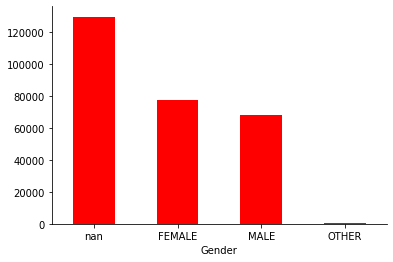

In [21]:
## Start code
users.gender.value_counts(dropna=False).plot(kind='bar', color='red', 
                                             rot=0)
plt.xlabel('Gender')


## End code
sns.despine()

#### Expected graph:
<img src="./eda_images/gender.png" height="400" width="400"/>

#### Exercise 6:
- Is there any **gender** preferences when travelling to destination country?
- Plot figure as shown below


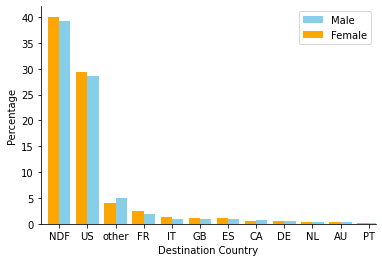

In [22]:
women = sum(users['gender'] == 'FEMALE')
men = sum(users['gender'] == 'MALE')

female_destinations = users.loc[users['gender'] == 'FEMALE', 
                    'country_destination'].value_counts() / women * 100
male_destinations = users.loc[users['gender'] == 'MALE', 
                    'country_destination'].value_counts() / men * 100

## Plot bar graph
# Bar width
width = 0.4

### Start code

male_destinations.plot(kind='bar', width=width, color='skyblue', 
                       position=0, label='Male', rot=0)
female_destinations.plot(kind='bar', width=width, color='orange', 
                         position=1, label='Female', rot=0)

plt.legend()
plt.xlabel('Destination Country')
plt.ylabel('Percentage')


### End code
sns.despine()
plt.show()

#### Expected graph:

<img src="./eda_images/destination_country.png" height="400" width="400"/>

#### Analysis: 
- Summary: no big difference between genders, but we find relative destination frequency of the countries.

### [2] Age

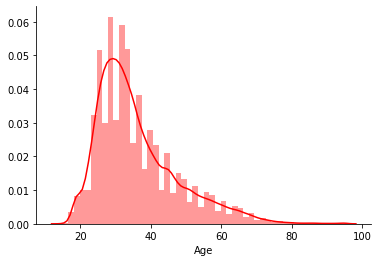

In [23]:
sns.distplot(users.age.dropna(), color='red')
plt.xlabel('Age')
sns.despine()

#### Analysis: The common age of travelers is between 20 and 50.
   - How about older people, do they travel in a different way?    

#### Exercise 7:
   - Lets take arbitrary **age** (eg: 45) and split into two groups, namely, *Young* and *Old* based on **country_destination**.
   - Plot figure as shown below.

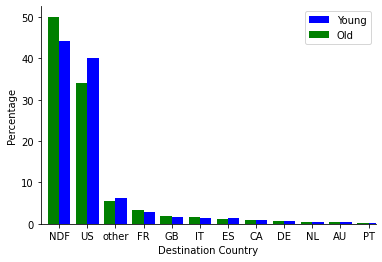

In [29]:
age = 45

### Start code 

younger = sum(users.loc[users['age'] < age,
                        'country_destination'].value_counts())
older = sum(users.loc[users['age'] > age,
                      'country_destination'].value_counts())

younger_destinations = users.loc[users['age'] < age,
                    'country_destination'].value_counts() / younger * 100
older_destinations = users.loc[users['age'] > age,
                    'country_destination'].value_counts() / older * 100

younger_destinations.plot(kind='bar', width=width, color='blue', 
                          position=0, label='Young', rot=0)
older_destinations.plot(kind='bar', width=width, color='green', 
                        position=1, label='Old', rot=0)

## End code

##Plot
## Start code

plt.legend()
plt.xlabel('Destination Country')
plt.ylabel('Percentage')

## End code
sns.despine()
plt.show()

#### Expected graph:

<img src="./eda_images/young_old.png" height="400" width="400"/>

#### Analysis: 
    
- The young people tends to stay in the US, and the older people choose to travel outside the country.
- But there are no big differences.
- Remember we do not have 42% of the ages.
- What about native language if 'en'?
        

#### Exercise 8:
   - What about native language if 'en', what percentage ? 

In [30]:
### Start code
print((sum(users.language == 'en') / users.shape[0])*100)

### End code

96.3675888323952


### [3] Dates

#### Plot number of user accounts created over time


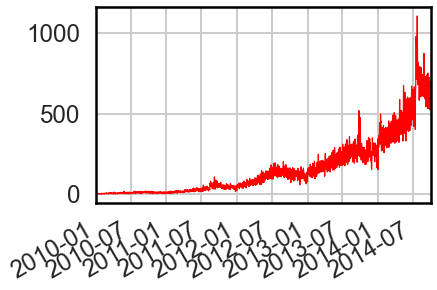

In [31]:

sns.set_style("whitegrid", {'axes.edgecolor': '0'})
sns.set_context("poster", font_scale=1.1)
users.date_account_created.value_counts().plot(kind='line', linewidth=1.2, color='red')


#### Analysis: 

- We observe how fast the traveler site has grown over the last few years. 
- Does this corelate with the date when the user was active for the first time? 
- **Exercise 9:** It might be similar, how to check the data!


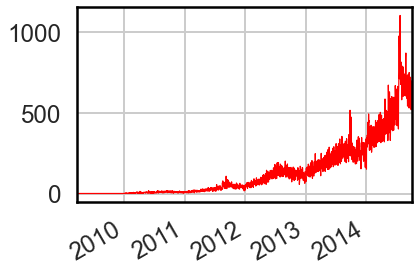

In [32]:
### Start code
users.date_first_active.value_counts().plot(kind='line', linewidth=1.2, color='red')

### End code

#### Analysis: 
   - We see almost same results as **date_account_created**.
   - Lets dig in peaks for more details.
    

#### Plot for year 2013 - date_account_created and date_first_active

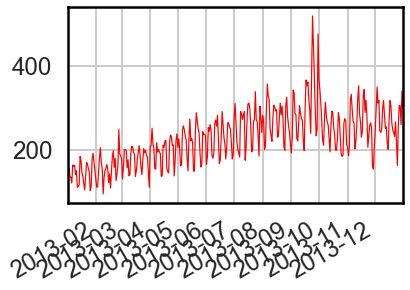

In [33]:
## Select 2013 year for date_account_created

users_2013_a = users[users['date_account_created'] > pd.to_datetime(20130101, format='%Y%m%d')]
users_2013_a = users_2013_a[users_2013_a['date_account_created'] < pd.to_datetime(20140101, format='%Y%m%d')]
users_2013_a.date_account_created.value_counts().plot(kind='line', linewidth=1.2, color='red')
plt.show()


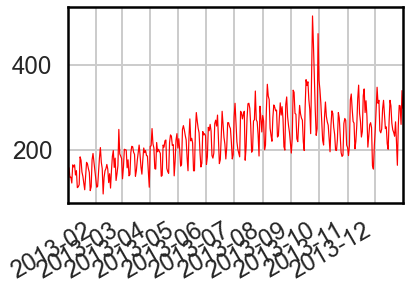

In [34]:
## Select 2013 year for date_first_active

users_2013 = users[users['date_first_active'] > pd.to_datetime(20130101, format='%Y%m%d')]
users_2013 = users_2013[users_2013['date_first_active'] < pd.to_datetime(20140101, format='%Y%m%d')]
users_2013.date_first_active.value_counts().plot(kind='line', linewidth=1.2, color='red')
plt.show()

#### Analysis:
  - Small patterns: some peaks at Oct. - Nov.
  - **Exercise 10:** Lets look more closely, in particular days
    

In [35]:
weekdays = []
for date in users.date_account_created:
    weekdays.append(date.weekday())
weekdays = pd.Series(weekdays)

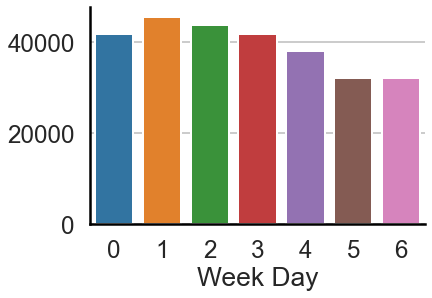

In [36]:
sns.barplot(x = weekdays.value_counts().index, y=weekdays.value_counts().values, order=range(0,7))
plt.xlabel('Week Day')
sns.despine()

#### Exercise 11: HW 
- Can you find some distinctions between **date_first_active** and **date_account_created** relating to **country_destination**?


#### Exercise 12: HW 
- Are there more registrations but less booking?

#### Exercise 13: HW 
- Does it make sense to find where do users stay when they book 'US'?

#### Exercise 14: HW 
- Try making plots about **devices** and **signups** for analysis

#### Exercise 15: HW 
- Raise many more questions and provide your analysis on rest of the attributes